In [14]:
import pyfesom2 as pf
import xarray as xr
import os
import pandas as pd
from collections import OrderedDict
from itertools import product
import matplotlib.pylab as plt
import numpy as np
from matplotlib import cm
%matplotlib inline
import matplotlib.pylab as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

import csv
import cmocean as cmo
import math
import shapely

In [15]:
# parameters cell
mesh_name = 'Core2'
meshpath = '/p/project/chhb19/streffing1/input/fesom2/core2/'
levels = np.linspace(20, 120, 11)
abg = [0, 0, 0]

influence=80000,
box=[-180, 180, -89, 90]
res=[360, 180]
interp="nn"
mapproj="pc"
ptype="cf"
units=None
titles=None
distances_path=None
inds_path=None
qhull_path=None
basepath=None
interpolated_data=None
lonreg=None
latreg=None
no_pi_mask=False


figsize=(9,5.56)
cmap=cmo.cm.thermal_r
dpi = 300
ofile = None

In [16]:
mesh = pf.load_mesh(meshpath)
data = xr.open_dataset(meshpath+'/fesom.mesh.diag.nc')
nod_area = data['nod_area'][0,:].values
nod_area = (np.sqrt(nod_area/np.pi)/1e3)*2


/p/project/chhb19/streffing1/input/fesom2/core2/pickle_mesh_py3_fesom2
The usepickle == True)
The pickle file for FESOM2 exists.
The mesh will be loaded from /p/project/chhb19/streffing1/input/fesom2/core2/pickle_mesh_py3_fesom2


In [17]:
data=nod_area

if not isinstance(data, list):
    data = [data]
if titles:
    if not isinstance(titles, list):
        titles = [titles]
    if len(titles) != len(data):
        raise ValueError(
            "The number of titles do not match the number of data fields, please adjust titles (or put to None)"
        )


radius_of_influence = influence

left, right, down, up = box
lonNumber, latNumber = res

lonreg = np.linspace(left, right, lonNumber)
latreg = np.linspace(down, up, latNumber)

lonreg2, latreg2 = np.meshgrid(lonreg, latreg)


interpolated = pf.interpolate_for_plot(
    data,
    mesh,
    lonreg2,
    latreg2,
    interp=interp,
    distances_path=distances_path,
    inds_path=inds_path,
    radius_of_influence=radius_of_influence,
    basepath=basepath,
    qhull_path=qhull_path,
    )



/tmp/ipykernel_15992/4043482784.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=30)


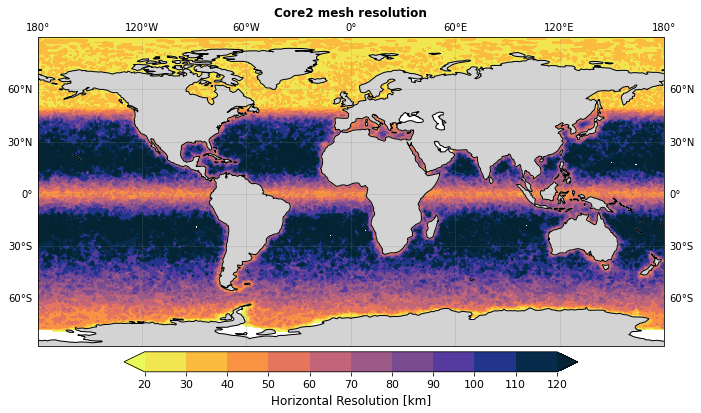

In [23]:
data_model_mean = OrderedDict()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=figsize)
if isinstance(axes, np.ndarray):
    axes = axes.flatten()
else:
    axes = [axes]
i = 0


    

axes[i]=plt.subplot(1,1,i+1,projection=ccrs.PlateCarree())
axes[i].add_feature(cfeature.COASTLINE,zorder=3)

imf=plt.contourf(lonreg, latreg, np.squeeze(interpolated), cmap=cmo.cm.thermal_r, 
                 levels=levels, extend='both',
                 transform=ccrs.PlateCarree(),zorder=1)

axes[i].set_ylabel('K')
axes[i].set_title(mesh_name+" mesh resolution",fontweight="bold")
axes[i].add_feature(cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgrey'))

plt.tight_layout() 

gl = axes[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
              linewidth=1, color='gray', alpha=0.2, linestyle='-')
gl.xlabels_bottom = False

cbar_ax_abs = fig.add_axes([0.15, 0.05, 0.7, 0.05])
cbar_ax_abs.tick_params(labelsize=12)
cb = fig.colorbar(imf, cax=cbar_ax_abs, orientation='horizontal',ticks=levels)
cb.set_label(label="Horizontal Resolution [km]", size='12')
cb.ax.tick_params(labelsize='11')
axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=30)

    
if ofile is not None:
    ofile_long = f"{ofile}_resolution.png"
    plt.savefig(f"{ofile_long}", dpi=dpi)
    os.system(f'convert {ofile_long} -trim {ofile_long}_trimmed.png')
    os.system(f'mv {ofile_long}_trimmed.png {ofile_long}')